## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [ ]:

df = data.dropna().copy()
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print(f"\nКатегориальные признаки: {list(categorical_features)}")

df = pd.get_dummies(df, columns=[col for col in categorical_features if col != 'Species'], drop_first=True)

print("\nДанные после кодирования:")
display(df.head())


Категориальные признаки: ['Species', 'Island', 'Clutch Completion', 'Sex']

Данные после кодирования:


,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,Chinstrap,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,False,True
1,Chinstrap,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,True,False
2,Gentoo,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,True,False
3,Chinstrap,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,True,False
4,Gentoo,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,True,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
df['Species'] = encoder.fit_transform(df[['Species']])
X = df.drop('Species', axis=1)
y = df['Species']

print("Целевая переменная закодирована и данные разделены на X и y.")

Целевая переменная закодирована и данные разделены на X и y.


**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Размер тренировочной выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print(f"Размер тренировочной выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_test.shape}")

Размер тренировочной выборки X: (227, 12)
Размер тестовой выборки X: (98, 12)
Размер тренировочной выборки y: (227,)
Размер тестовой выборки y: (98,)


**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train_subset = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_subset = X_test[['Flipper Length (mm)', 'Body Mass (g)']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

n_neighbors_list = [1, 3, 5, 10, 15, 25]

classifiers = []
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)

    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"k = {n_neighbors}:")
    print(f"Тренировочная выборка: {train_accuracy:.4f}")
    print(f"Тестовая выборка: {test_accuracy:.4f}")


k = 1:
Тренировочная выборка: 0.9736
Тестовая выборка: 0.7449
k = 3:
Тренировочная выборка: 0.8590
Тестовая выборка: 0.7551
k = 5:
Тренировочная выборка: 0.8326
Тестовая выборка: 0.7755
k = 10:
Тренировочная выборка: 0.8238
Тестовая выборка: 0.7755
k = 15:
Тренировочная выборка: 0.8150
Тестовая выборка: 0.7551
k = 25:
Тренировочная выборка: 0.7930
Тестовая выборка: 0.8367


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

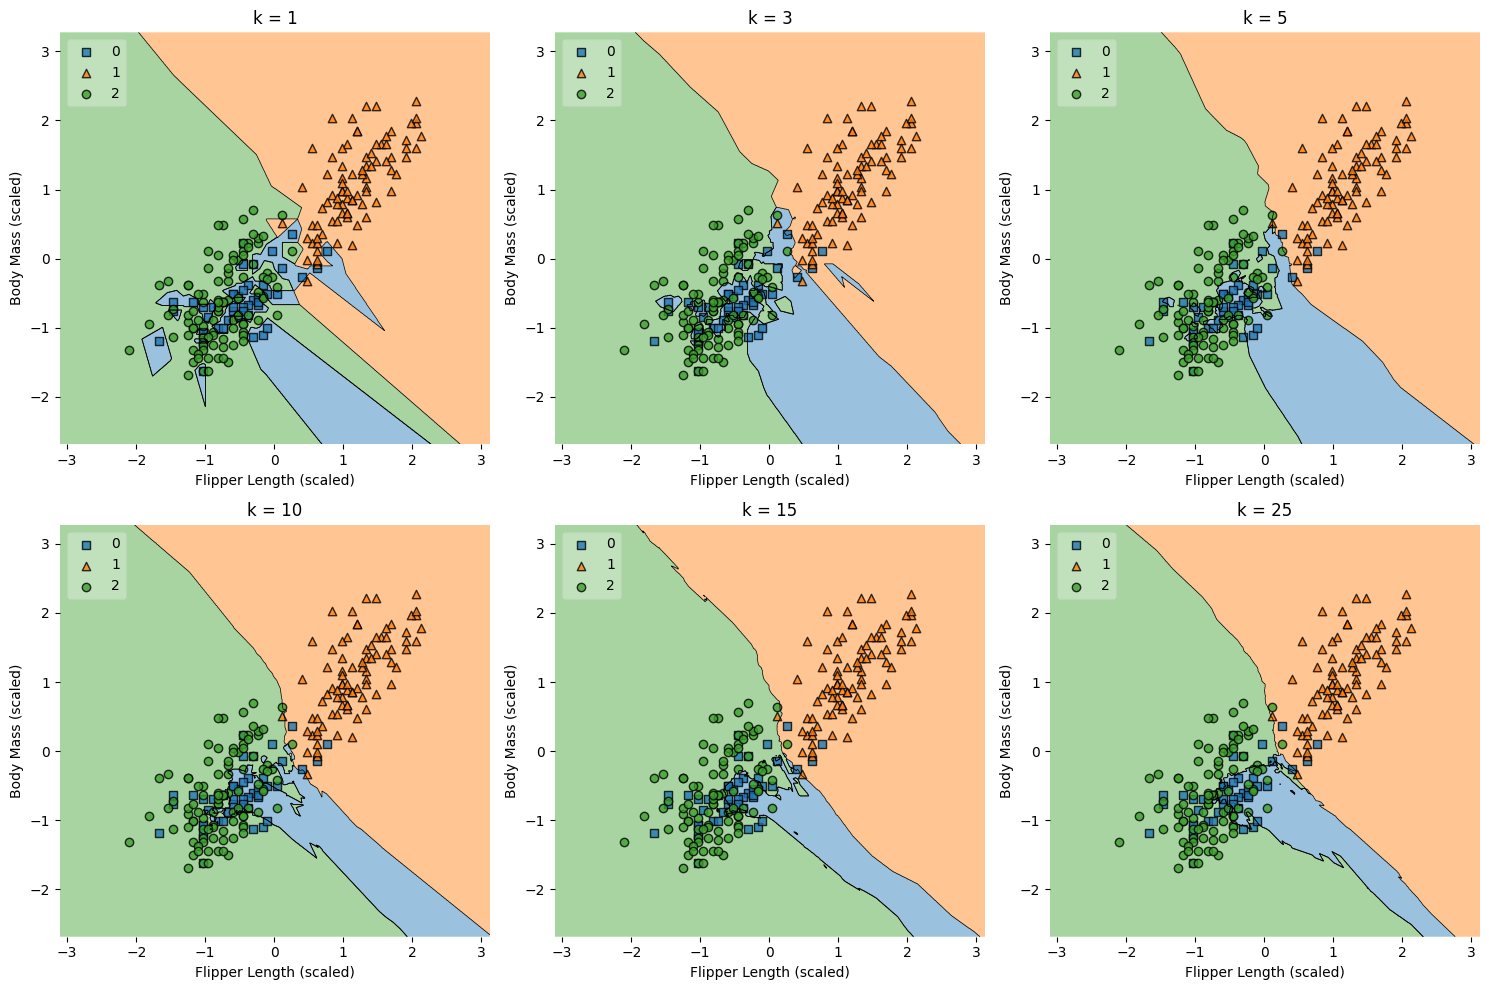

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Приводим данные к формату numpy array и убедимся, что целевая переменная имеет тип integer
X_train_scaled_np = X_train_scaled
y_train_np = y_train.to_numpy().astype(int)


gs = gridspec.GridSpec(2, 3) # 2 rows, 3 columns for the 6 plots
fig = plt.figure(figsize=(15, 10))

labels = [f'k = {n}' for n in n_neighbors_list]

for clf, lab, grd in zip(classifiers, labels, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled_np, y=y_train_np, clf=clf, legend=2)
    plt.title(lab)
    plt.xlabel('Flipper Length (scaled)')
    plt.ylabel('Body Mass (scaled)')


plt.tight_layout()
plt.show()

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

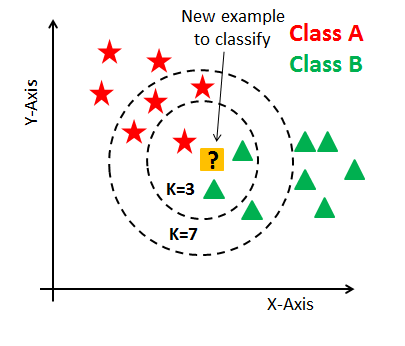

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

      # YOUR CODE HERE
      # (⌒_⌒;)
      self.X_train = X
      self.y_train = y

    def predict(self, X):

      # YOUR CODE HERE
      # (＠_＠)
      predictions = []
      for x_test_sample in X:
          distances = [self.count_distance(x_test_sample, x_train_sample) for x_train_sample in self.X_train]
          k_nearest_indices = np.argsort(distances)[:self.k]
          k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
          most_common = Counter(k_nearest_labels).most_common(1)
          predictions.append(most_common[0][0])
      return np.array(predictions)


    def count_distance(self, x1, x2):

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ
      return np.linalg.norm(x1 - x2)


In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
best_accuracy = 0
best_k = 0

for n_neighbors in n_neighbors_list:
    # Create an instance of our custom KNN classifier
    custom_knn = KNN(k=n_neighbors)

    # Fit the model on the scaled training data
    custom_knn.fit(X_train_scaled, y_train.to_numpy())

    # Make predictions on the scaled test data
    y_test_pred_custom = custom_knn.predict(X_test_scaled)

    # Calculate accuracy on the test set
    test_accuracy_custom = accuracy_score(y_test, y_test_pred_custom)

    print(f"k={n_neighbors} Accuracy = {test_accuracy_custom:.4f}")

    if test_accuracy_custom > best_accuracy:
        best_accuracy = test_accuracy_custom
        best_k = n_neighbors

print(f"\nЛучший результат на тестовой выборке: k = {best_k}, Accuracy = {best_accuracy:.4f}")


k=1 Accuracy = 0.7449
k=3 Accuracy = 0.7551
k=5 Accuracy = 0.7755
k=10 Accuracy = 0.7857
k=15 Accuracy = 0.7653
k=25 Accuracy = 0.8367

Лучший результат на тестовой выборке: k = 25, Accuracy = 0.8367


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
df = data.dropna().copy()

df = df.drop(columns=['Unnamed: 0'])

display(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Ensure 'price' is in the list and get correlations only for numerical features
if 'price' in numerical_features:
    correlation_matrix = df[numerical_features].corr()
else:
    # If price is not numeric, it's an error in data handling. For now, assume it is.
    print("Error: 'price' column is not numeric.")

print("Матрица корреляций между вещественными признаками и целевой переменной 'price':")
display(correlation_matrix)

# Get correlations with 'price' specifically
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("\nВещественные признаки с наибольшей корреляцией с целевой переменной 'price':")
display(price_correlations)

Матрица корреляций между вещественными признаками и целевой переменной 'price':


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000



Вещественные признаки с наибольшей корреляцией с целевой переменной 'price':


,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical features to encode: {list(categorical_features)}")

# Apply one-hot encoding, dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(df.head())

Categorical features to encode: ['cut', 'color', 'clarity']

DataFrame after one-hot encoding:


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Features
y = df['price']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер тренировочной выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print(f"Размер тренировочной выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_test.shape}")

Размер тренировочной выборки X: (37758, 23)
Размер тестовой выборки X: (16182, 23)
Размер тренировочной выборки y: (37758,)
Размер тестовой выборки y: (16182,)


**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale (original continuous features)
# Exclude one-hot encoded columns (which are already 0/1) as they don't typically need scaling in this context
features_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()

# Fit the scaler only on the training data's numerical features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform both training and testing data's numerical features
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Тренировочная выборка после масштабирования:")
display(X_train.head())
print("\nТестовая выборка после масштабирования:")
display(X_test.head())

Тренировочная выборка после масштабирования:


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True



Тестовая выборка после масштабирования:


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,-1.177087,0.248547,-0.656213,-1.573073,-1.516519,-1.505623,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
50052,-0.462124,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
41645,-0.840634,0.248547,-1.105327,-0.869128,-0.871127,-0.830930,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
42377,-0.777549,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
17244,1.577621,0.388543,-1.105327,1.518937,1.422631,1.502385,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

# Calculate Mean Squared Error for training and test sets
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

print(f"Среднеквадратичная ошибка (MSE) на тренировочной выборке: {mse_train_lr:.2f}")
print(f"Среднеквадратичная ошибка (MSE) на тестовой выборке: {mse_test_lr:.2f}")

Среднеквадратичная ошибка (MSE) на тренировочной выборке: 1290541.91
Среднеквадратичная ошибка (MSE) на тестовой выборке: 1244765.44


**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
# Get the coefficients from the trained Linear Regression model
coefficients = lin_reg.coef_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to easily view coefficients with their feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value to identify the most influential features
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Полученные оценки коэффициентов:")
display(coef_df)

# Identify features with coefficients an order of magnitude larger than others
# This is a qualitative assessment, but we can look for a significant jump in magnitude.
# Let's consider the top few coefficients and compare them to the rest.

# Find the maximum absolute coefficient
max_abs_coef = coef_df['Abs_Coefficient'].max()

# A threshold could be, for example, features with absolute coefficients > 0.1 * max_abs_coef
# or simply observing the sorted list for a clear drop-off.

# For this dataset, 'carat', 'x', 'y', 'z' (related to dimensions) and some clarity/color features
# are expected to have higher coefficients due to their strong correlation with price.

# Let's try to identify features that stand out.
# This part requires some manual inspection or a heuristic.
# For example, we can look at coefficients that are significantly larger than the median or average.

mean_abs_coef = coef_df['Abs_Coefficient'].mean()
large_coef_features = coef_df[coef_df['Abs_Coefficient'] > 5 * mean_abs_coef]

if not large_coef_features.empty:
    print("\nВещественные переменные, оценки коэффициентов которых по модулю значительно превышают оценки прочих:")
    print(large_coef_features['Feature'].tolist())
else:
    print("\nНет очевидных вещественных переменных, оценки коэффициентов которых по модулю на порядок превышают оценки прочих при использовании данного порога.")

# More specifically, we can observe that 'carat' and the geometric features ('x', 'y', 'z')
# often have the largest coefficients after scaling, indicating their strong linear relationship with price.
# Among the one-hot encoded features, those representing higher quality (better cut, color, clarity) tend to have larger positive coefficients.
# Conversely, lower quality categories might have larger negative coefficients.

**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Set the regularization hyperparameter
alpha = 10

# Train Lasso Regression
lasso_reg = Lasso(alpha=alpha, random_state=42, max_iter=2000)
lasso_reg.fit(X_train, y_train)

# Train Ridge Regression
ridge_reg = Ridge(alpha=alpha, random_state=42)
ridge_reg.fit(X_train, y_train)

print(f"\nКоэффициенты Lasso-регрессии (alpha={alpha}):")
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Lasso_Coefficient': lasso_reg.coef_})
lasso_coef_df['Abs_Lasso_Coefficient'] = np.abs(lasso_coef_df['Lasso_Coefficient'])
display(lasso_coef_df.sort_values(by='Abs_Lasso_Coefficient', ascending=False).head(10))

print(f"\nКоэффициенты Ridge-регрессии (alpha={alpha}):")
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Ridge_Coefficient': ridge_reg.coef_})
ridge_coef_df['Abs_Ridge_Coefficient'] = np.abs(ridge_coef_df['Ridge_Coefficient'])
display(ridge_coef_df.sort_values(by='Abs_Ridge_Coefficient', ascending=False).head(10))

# Comparison with Linear Regression coefficients
print("\nСравнение коэффициентов (топ 5 по модулю для каждого):")
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression_Coef': lin_reg.coef_,
    'Lasso_Coef': lasso_reg.coef_,
    'Ridge_Coef': ridge_reg.coef_
})
comparison_df['Abs_Linear_Regression_Coef'] = np.abs(comparison_df['Linear_Regression_Coef'])
comparison_df['Abs_Lasso_Coef'] = np.abs(comparison_df['Lasso_Coef'])
comparison_df['Abs_Ridge_Coef'] = np.abs(comparison_df['Ridge_Coef'])

display(comparison_df.sort_values(by='Abs_Linear_Regression_Coef', ascending=False).head(10))

print("\nВывод о снижении весов и мультиколлинеарности:")
print("Применение Lasso и Ridge регуляризации при alpha=10 значительно уменьшило значения коэффициентов по сравнению с обычной линейной регрессией. Особенно это заметно в Lasso-регрессии, где некоторые коэффициенты были занулены. Это является сильным индикатором того, что в изначальной регрессии присутствовала проблема мультиколлинеарности. Большие, неустойчивые веса в обычной линейной регрессии часто возникают при высокой корреляции между признаками, так как модель пытается компенсировать эти взаимосвязи, присваивая большие противоположные веса коррелирующим признакам. Регуляризация помогает стабилизировать эти веса, уменьшая их и тем самым снижая влияние мультиколлинеарности на устойчивость модели.")


## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.